# Variação total e percentual de um ativo de renda variável

## **AVISO LEGAL**

Os ativos que aparecerão neste notebook são meramente ilustrativas e de nenhuma forma representam recomendações de compra.

## Introdução

### Objetivo

A ideia neste notebook é desenvolver um código que retorne um gráfico contendo a variação total e percentual para cada ativo de renda variável dado uma carteira contendo o código do ativo, quantidade comprada, valor da unidade e a data em que a compra foi feita. 

Obs: É possível comprar um mesmo ativo em datas diferentes.

### Definições básicas e generalizações

Definimos a **variação total** de um investimento por

$$ \Delta (t) \equiv A(t) - I(t),$$

onde $A(t)$ é o valor atual do patrimônio em $t$, e $I(t)$ é o valor investido até $t$.

Além disso, definimos a **variação percentual** como

$$ \delta (t) \equiv \frac{A(t) - I(t)}{I(t)} = \frac{A(t)}{I(t)} -1.$$

Essas são as ideias básicas para cumprir o objetivo deste notebook. Feito isso, vamos começar pelo exemplo mais simples e sofisticando-o aos poucos.


#### Ex.1: $q_0$ unidades de um ativo comprados pelo preço (da unidade) $X_0$ em $t_0$

Como $I(t < t_0) = 0$, então não faz sentido fazer um gráfico para $t < t_0$. Daí, para $t > t_0$, $A(t) = q_0 X$, e $I(t) = q_0 X_0$, onde $X = X(t)$ é o preço do ativo em $t$; o que nos leva a 

$$  \Delta (t) = q_0(X - X_0), $$

$$ \delta (t) = \frac{X}{X_0} -1. $$

#### Ex.2: Um mesmo ativo comprado em 2 instantes distintos

Sejam $q_1 = q(t_1)$ e $X_1 = X(t_1)$, com $t_1 > t_0$, e $(q_0,X_0)$ como no exemplo anterior. Logo, para $t_0 < t < t_1$ a variação total continua sendo $\Delta = q_0(X - X_0)$; mas, para $t > t_1$, temos $A(t) = q_0X + q_1X = (q_0 + q_1)X$ e $I(t) = q_0X_0 + q_1X_1$; e assim, definindo a quantidade total $Q$ como

$$ Q \equiv q_0 + q_1,$$

e chamando a média ponderada do preço do ativo comprado nos instantes $t_0$ e $t_1$ de $ \overline{X} $,

$$ \overline{X} \equiv \frac{q_0 X_0 + q_1 X_1}{q_0 + q_1}, $$

segue que

$$ \Delta = (q_0 + q_1)X - (q_0X_0 + q_1X_1)  = Q(X - \overline{X}),$$

$$ \delta = \frac{(q_0 + q_1)X}{q_0 X_0 + q_1 X_1} -1 = \frac{X}{\overline{X}} -1.$$

Portanto,

$$ \Delta (t) = \begin{cases} q_0(X - X_0) & t_0 < t < t_1, \\ Q(X - \overline{X}) & t_1 < t. \end{cases}  $$

$$ \delta (t) = \begin{cases} X X_0^{-1} -1 & t_0 < t < t_1, \\ X \overline{X}^{-1} -1 & t_1 < t. \end{cases} $$

#### Ex.3: Um mesmo ativo comprado em $n$ instantes distintos

Fazendo $n$ compras de um mesmo ativo em instantes distintos, é fácil mostrar que as variações terão a mesma estrutura que no caso anterior.

Chamando a quantidade total até a k-ésima compra ($k < n$) por

$$ Q_k \equiv \sum_{i = 0}^k q_i,$$

e a média ponderada até a k-ésima compra por

$$ \overline{X}_k \equiv \frac{1}{Q_k}\sum_{i = 0}^k q_i X_i, $$

segue que a variação total é

$$ \Delta (t) = \begin{cases} q_0(X - X_0) & t_0 < t < t_1, \\ \vdots \\ Q_k(X - \overline{X}_k) & t_k < t < t_{k+1}, \\ \vdots \\ Q_{n-1}(X - \overline{X}_{n-1}) & t_{n-1} < t, \end{cases} $$

e que a variação percentual é

$$ \delta (t) = \begin{cases} X(X_0)^{-1} -1 & t_0 < t < t_1, \\ \vdots \\ X(\overline{X}_k)^{-1} -1 & t_k < t < t_{k+1}, \\ \vdots \\ X(\overline{X}_{n-1})^{-1} -1 & t_{n-1} < t. \end{cases} $$

## Arquivo de entrada

### Inserindo a carteira manualmente

Para nossas análises neste notebook, assumiremos que toda carteira deva ter 4 colunas, que são "Ativo", "Quantidade", "Compra (R$)", e "Data da Compra", onde a última coluna tem que estar no formato "dd/mm/aaaa" (mais tarde faremos a conversão para o formato americano).

Sendo assim, o código para a criação manual de uma carteira com essas características fica

In [5]:
from pandas import DataFrame

Ativos = []
Quantidades = []
Precos = []
Fechas = []

lampada = True
while lampada:
    Ativos.append(input('\nDigite o código do ativo: '))

    Quantidades.append(int(input('Digite a quantidade comprada: ')))

    Precos.append(float(input('Digite o preço de compra da unidade: ')))

    Fechas.append(input('Digite a data da compra no formato dd/mm/aaaa: '))

    char = input('\nGostaria de inserir mais uma compra na carteira? [s/n]: ')

    if char == 'n':
        lampada = False

        carteira = DataFrame({'Ativo':Ativos,
                             'Quantidade':Quantidades,
                             'Compra (R$)':Precos,
                             'Data da Compra':Fechas})

carteira


Digite o código do ativo:  VALE3
Digite a quantidade comprada:  3
Digite o preço de compra da unidade:  112.49
Digite a data da compra no formato dd/mm/aaaa:  13/05/2021

Gostaria de inserir mais uma compra na carteira? [s/n]:  n


,Ativo,Quantidade,Compra (R$),Data da Compra
0,VALE3,3,112.49,13/05/2021


Aqui colocamos as ações da Vale apenas como ilustração.

### Inserindo uma carteira pronta

Para uma carteira pronta em arquivo ```.csv```, contendo as informações mencionadas anteriormente, devemos apenas informar os caracteres de separação de colunas, decimais e o nome do arquivo. Assim, usando o arquivo ```CarteiraTeste.csv``` como exemplo de carteira para realizarmos os gráficos, temos

In [1]:
from pandas import read_csv

arquivo = input('Digite o nome do arquivo incluindo o .csv: ')

separador = input('Digite o caractere que separa as colunas: ')

dec = input('Digite o caractere de decimal: ')

carteira = read_csv(arquivo,
                    sep = separador,
                    decimal = dec)

carteira

Digite o nome do arquivo incluindo o .csv:  CarteiraTeste.csv
Digite o caractere que separa as colunas:  ;
Digite o caractere de decimal:  ,


,Ativo,Quantidade,Compra (R$),Data da Compra
0,VALE3,3,112.49,13/05/2021
1,PETR4,8,24.04,05/04/2021
2,ITUB4,2,30.80,25/06/2021
3,VALE3,4,96.09,18/03/2022
4,VALE3,15,77.08,04/01/2022
5,ITUB4,9,22.15,14/07/2022


Aqui reiteramos mais uma vez que, neste notebook, os ativos escolhidos possuem finalidade estritamente ilustrativa. Também vale ressaltar que coloquei ativos comprados mais de uma vez para implementar as fórmulas da variação total e percentual.

### Mudando o formato de data

Como faremos uma requisição API do Yahoo Finanças, devemos transformar nossa string num objeto de data, que é feito com a biblioteca ```datetime``` e usando de novo a função ```read_csv```, mas especificando os parâmetros ```parse_dates``` e ```date_parser```.

In [2]:
from datetime import datetime
from pandas import read_csv

def conversor(fecha):
    return datetime.strptime(fecha, '%d/%m/%Y')

carteira = read_csv(arquivo,
                    sep = separador,
                    decimal = dec,
                    parse_dates = ['Data da Compra'],
                    date_parser = conversor)

carteira

,Ativo,Quantidade,Compra (R$),Data da Compra
0,VALE3,3,112.49,2021-05-13
1,PETR4,8,24.04,2021-04-05
2,ITUB4,2,30.80,2021-06-25
3,VALE3,4,96.09,2022-03-18
4,VALE3,15,77.08,2022-01-04
5,ITUB4,9,22.15,2022-07-14


## Processamento dos dados

### Criação das Sub-Carteiras

A ideia desta seção é produzir DataFrame's contendo apenas um tipo de ativo através do objeto inicial ```carteira```. 

Antes disso, vamos ordenar toda a tabela pela ordem cronológica da data de compra, pois desta maneira todas as sub-carteiras estarão ordenadas nesse critério.

In [3]:
carteira.sort_values(by = 'Data da Compra',
                     inplace = True)

carteira

,Ativo,Quantidade,Compra (R$),Data da Compra
1,PETR4,8,24.04,2021-04-05
0,VALE3,3,112.49,2021-05-13
2,ITUB4,2,30.80,2021-06-25
4,VALE3,15,77.08,2022-01-04
3,VALE3,4,96.09,2022-03-18
5,ITUB4,9,22.15,2022-07-14


Agora vamos obter uma lista ordenada contendo o nome de todos os ativos que existem na carteira. Dentre as diferentes maneiras de fazer isso, vamos criar um conjunto para retirar os elementos repetidos, e depois criar uma lista em cima desse conjunto.

In [4]:
lista = list( set(carteira['Ativo']) )

lista.sort()

lista

['ITUB4', 'PETR4', 'VALE3']

Agora que temos essa lista, vamos percorrê-la de modo que em cada passo vamos criar uma sub-carteira com o método ```loc``` do pandas.

In [5]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    print(subcarteira,'\n')
    # break

   Ativo  Quantidade  Compra (R$) Data da Compra
2  ITUB4           2        30.80     2021-06-25
5  ITUB4           9        22.15     2022-07-14 

   Ativo  Quantidade  Compra (R$) Data da Compra
1  PETR4           8        24.04     2021-04-05 

   Ativo  Quantidade  Compra (R$) Data da Compra
0  VALE3           3       112.49     2021-05-13
4  VALE3          15        77.08     2022-01-04
3  VALE3           4        96.09     2022-03-18 



### Roteiro para os próximos passos

Boa parte das linhas de comando daqui em diante estarão dentro do laço ```for``` do bloco executado anteriormente, porque devemos, para cada subcarteira,

* Atualizar o valor da média ponderada a cada nova compra do mesmo ativo, o que significa criar uma nova coluna na subcarteira correspondente a $\overline{X}_k$

* Coletar a data mais antiga, que é a primeira pois os dados foram organizados de forma ascendente;

* Usar essa data para fazer uma requisição API do Yahoo Finanças e coletar o histórico do preço do ativo no período da primeira compra até hoje, onde ```hoje = datetime.date.today()```;

* Criar 2 DataFrame's com o mesmo número de linhas da tabela do histórico do preço do ativo, em que um é para os valores da Variação Total ($\Delta (t)$), e outro é para a Variação Percentual ($\delta (t)$). Obs: a cada recompra do mesmo ativo, as fórmulas que determinam essas variações mudam.

* Fazer numa mesma tela um gráfico contendo as duas variações. Para isso é necessário haver 2 eixos y, um na direita e outro na esquerda da tela.

### Médias Ponderadas

Voltando à nossa subcarteira.

In [6]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    print(subcarteira)

    break

   Ativo  Quantidade  Compra (R$) Data da Compra
2  ITUB4           2        30.80     2021-06-25
5  ITUB4           9        22.15     2022-07-14


Vamos resetar os índices para conseguir criar uma nova coluna.

In [6]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    subcarteira = subcarteira.reset_index(drop = True)
    
    print(subcarteira)
    
    break

   Ativo  Quantidade  Compra (R$) Data da Compra
0  ITUB4           2        30.80     2021-06-25
1  ITUB4           9        22.15     2022-07-14


Conforme visto na introdução, precisamos saber o valor da soma até a k-ésima compra, o que pode ser implementado com a função abaixo:

In [7]:
def Soma(subcarteira):
    lista_antiga = list(subcarteira['Quantidade'])
    
    lista_nova = []
    for indice in range(0, len(lista_antiga)):
        if indice == 0:
            lista_nova.append(lista_antiga[indice])
        else:
            lista_nova.append( lista_antiga[indice] + lista_nova[indice - 1] )

    return lista_nova

Feito isso, vamos criar a coluna da k-ésima compra.

In [8]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    subcarteira = subcarteira.reset_index(drop = True)
    
    
    subcarteira['Q_k'] = Soma(subcarteira)

      

    print(subcarteira)
    
    break

   Ativo  Quantidade  Compra (R$) Data da Compra  Q_k
0  ITUB4           2        30.80     2021-06-25    2
1  ITUB4           9        22.15     2022-07-14   11


Sendo assim, o próximo passo é criar uma coluna correspondente à k-ésima média ponderada, que pode ser realizado com a função abaixo:

In [9]:
from numpy import average

def Media(subcarteira):
    resultado = []

    valores = list(subcarteira['Compra (R$)'])
    pesos = list(subcarteira['Quantidade'])

    v_parcial = []
    p_parcial = []

    for indice in range(0, len(valores)): # poderia ser len(pesos) também
        v_parcial.append(valores[indice])
        p_parcial.append(pesos[indice])

        media = average(a = v_parcial,
                        weights = p_parcial)

        resultado.append(media)

    return resultado

Aplicando essa função dentro do laço, temos

In [10]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    subcarteira = subcarteira.reset_index(drop = True)
        
    subcarteira['Q_k'] = Soma(subcarteira)

    subcarteira['X_k'] = Media(subcarteira)
    

    print(subcarteira)
    
    break

   Ativo  Quantidade  Compra (R$) Data da Compra  Q_k        X_k
0  ITUB4           2        30.80     2021-06-25    2  30.800000
1  ITUB4           9        22.15     2022-07-14   11  23.722727


### Requisição API

Uma forma de coletar o histórico de um ativo da bolsa de valores é através da biblioteca ```pandas_datareader```. Em particular, faremos uma requisição API do Yahoo Finanças.

Começaremos criando uma função a fim de que o laço ```for``` não fique muito grande. Além disso, vale ressaltar que no site do Yahoo, as empresas estão listadas na forma 'XXXXY.SA', onde 'XXXXY' é o código listado na B3.

In [11]:
from datetime import date
from pandas_datareader import data as web

hoje = date.today()

def yahoo(ativo,tabela):
    
    fechas = list( tabela['Data da Compra'] )
    PrimeiraCompra = fechas[0]
    
    cotacoes = web.DataReader(ativo + '.SA', 
                               data_source = 'yahoo',
                               start = PrimeiraCompra,
                               end = hoje)
    return cotacoes
    

Agora vamos testar essa função no nosso laço.

In [12]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    subcarteira = subcarteira.reset_index(drop = True)
        
    subcarteira['Q_k'] = Soma(subcarteira)

    subcarteira['X_k'] = Media(subcarteira)
    
    df = yahoo(nome,subcarteira)
    
    #print(subcarteira, '\n')

    print(df)
    
    break
    #print(subcarteira,'\n')

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2021-06-25  32.130001  30.610001  31.980000  30.799999  38927900.0  30.011980
2021-06-28  30.900000  30.049999  30.840000  30.450001  36032900.0  29.670940
2021-06-29  30.440001  29.830000  30.260000  30.150000  30557500.0  29.378614
2021-06-30  30.270000  29.770000  30.000000  29.799999  22510200.0  29.037567
2021-07-01  29.980000  29.320000  29.790001  29.690001  20278100.0  28.944954
...               ...        ...        ...        ...         ...        ...
2022-08-02  23.840000  23.379999  23.629999  23.719999  21401200.0  23.719999
2022-08-03  23.940001  23.540001  23.700001  23.889999  20046500.0  23.889999
2022-08-04  24.570000  23.969999  24.049999  24.469999  33908800.0  24.469999
2022-08-05  25.129999  24.230000  24.490000  24.930000  56175000.0  24.930000
2022-08-08  25.290001  24.780001  25.080000  25.240000  40938100

Tomaremos o preço de fechamento como o valor base para calcular as variações. Assim, vamos excluir as demais colunas.

In [13]:
df.drop(columns = ['High', 'Low', 'Open', 'Volume', 'Adj Close'],
        inplace = True)

df

,Close
Date,
2021-06-25,30.799999
2021-06-28,30.450001
2021-06-29,30.150000
2021-06-30,29.799999
2021-07-01,29.690001
...,...
2022-08-02,23.719999
2022-08-03,23.889999
2022-08-04,24.469999


Note que executamos a linha de comando acima fora do laço para não correr o risco do nosso IP ser banido por fazer várias vezes uma requisição API. Quando terminarmos as análises, colocaremos todo o bloco de códigos desenvolvido daqui em diante de volta ao laço.

## Cálculo de $\Delta (t)$ e $\delta(t)$ propriamente dito

Com todo o processamento de dados que fizemos anteriormente, estamos agora em condições de calcular as variações total e percentual de cada ativo em nossa carteira. 

Para começar, vejamos como ficou a tabela das cotações e a subcarteira.

In [14]:
print(subcarteira, '\n')

print(df)

   Ativo  Quantidade  Compra (R$) Data da Compra  Q_k        X_k
0  ITUB4           2        30.80     2021-06-25    2  30.800000
1  ITUB4           9        22.15     2022-07-14   11  23.722727 

                Close
Date                 
2021-06-25  30.799999
2021-06-28  30.450001
2021-06-29  30.150000
2021-06-30  29.799999
2021-07-01  29.690001
...               ...
2022-08-02  23.719999
2022-08-03  23.889999
2022-08-04  24.469999
2022-08-05  24.930000
2022-08-08  25.240000

[280 rows x 1 columns]


Note que $Q_k = Q(t_k)$, assim como $\overline{X}_k = \overline{X}(t_k)$, isto é, apenas atualizamos os valores da soma das quantidades (pesos) e da média ponderada no instante $t_k$, em que uma nova compra do mesmo ativo é feita.

Tendo isso em vista, vamos criar duas novas colunas associadas a essas grandezas com a seguinte função.

In [15]:
def Copias(subcarteira, df):
    listaQ = []
    listaX = []

    q = list( subcarteira['Q_k'])
    x = list( subcarteira['X_k'])


    DataCompra = list( subcarteira['Data da Compra'])
    
    ultimoindice = len(DataCompra) - 1
    
    UltimaData = DataCompra[ ultimoindice ]

    indice = 0

    for dia in df.index:

        if dia >= UltimaData:

            listaQ.append(q[ultimoindice])
            listaX.append(x[ultimoindice])

        else:

            if dia >= DataCompra[indice] and dia < DataCompra[indice + 1]:

                listaQ.append(q[indice])
                listaX.append(x[indice])

            else:

                indice += 1
                listaQ.append(q[indice])
                listaX.append(x[indice])

    return listaQ, listaX

Aplicando essa função na nossa subcarteira e tabela de cotações,

In [20]:
listaQ, listaX = Copias(subcarteira,df)

print(listaQ)

print(listaX)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 

Incluindo esses dados em nosso DataFrame, 

In [16]:
# df['Q_k'] = listaQ

# df['X_k'] = listaX

df['Q_k'], df['X_k'] = Copias(subcarteira,df)

df

,Close,Q_k,X_k
Date,,,
2021-06-25,30.799999,2,30.800000
2021-06-28,30.450001,2,30.800000
2021-06-29,30.150000,2,30.800000
2021-06-30,29.799999,2,30.800000
2021-07-01,29.690001,2,30.800000
...,...,...,...
2022-08-02,23.719999,11,23.722727
2022-08-03,23.889999,11,23.722727
2022-08-04,24.469999,11,23.722727


Para verificarmos se de fato a mudança da soma das quantidades e da média ponderada foram inseridas na data correta, que no nosso caso é o dia 14/07/2022, vejamos a tabela perto desse instante.

In [17]:
df.loc['2022-07-13':'2022-07-15',:]

,Close,Q_k,X_k
Date,,,
2022-07-13,22.400000,2,30.800000
2022-07-14,22.150000,11,23.722727
2022-07-15,22.549999,11,23.722727


Como podemos ver, a função alterou o valor de $Q_k$ e $\overline{X}_k$ na data esperada. 

Feito isso, podemos calcular o valor das variações usando diretamente as fórmulas desenvolvidas na introdução.

In [18]:
df['Variação Total (R$)'] = df['Q_k'] * (df['Close'] - df['X_k'])

df['Variação Percentual'] = (df['Close'] / df['X_k']) -1

df

,Close,Q_k,X_k,Variação Total (R$),Variação Percentual
Date,,,,,
2021-06-25,30.799999,2,30.800000,-0.000002,-2.477076e-08
2021-06-28,30.450001,2,30.800000,-0.699998,-1.136361e-02
2021-06-29,30.150000,2,30.800000,-1.300001,-2.110391e-02
2021-06-30,29.799999,2,30.800000,-2.000002,-3.246756e-02
2021-07-01,29.690001,2,30.800000,-2.219999,-3.603894e-02
...,...,...,...,...,...
2022-08-02,23.719999,11,23.722727,-0.030008,-1.149935e-04
2022-08-03,23.889999,11,23.722727,1.839993,7.051133e-03
2022-08-04,24.469999,11,23.722727,8.219992,3.150026e-02


## Gráficos

Para fazermos gráficos de séries temporais, precisamos executar a seguinte função do pandas.

In [19]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

Agora definamos uma função que realiza os gráficos das variações.

In [40]:
from matplotlib.pyplot import subplots,show

def graficos(df):
    
    fig, ax1 = subplots()

    ax1.set_xlabel('t')
    ax1.set_ylabel('Variação Total (R$)') #, color=color)

    ax1.plot(df['Variação Total (R$)'], color = 'navy', label = '$\Delta(t)$') 
    ax1.legend(loc = 'lower left')

    ax2 = ax1.twinx() 

    ax2.set_ylabel('Variação Percentual')
    ax2.plot(df['Variação Percentual'], color = 'green', label = '$\delta(t)$')
    ax2.legend(loc = 'lower right')

    fig.tight_layout() 
    show()

Aplicando essa função em nossa tabela.

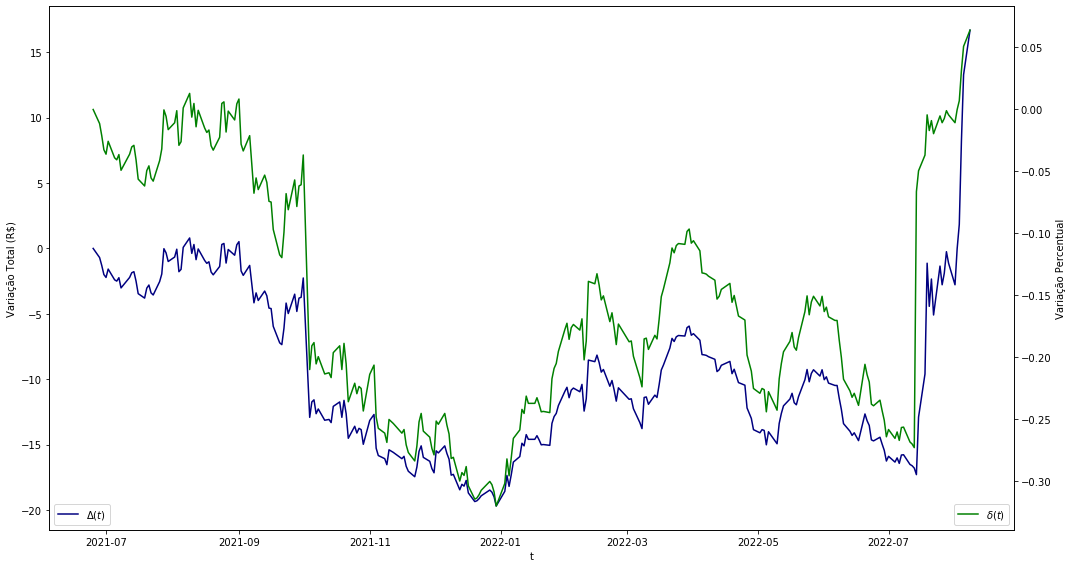

In [41]:
graficos(df)

Como estamos num notebook, vamos alterar a função de modo que o tamanho do gráfico fique maior.

In [38]:
from matplotlib.pyplot import subplots,show, rcParams

rcParams['figure.figsize'] = (15,8)

def graficos(df):
    
    fig, ax1 = subplots()

    ax1.set_xlabel('t')
    ax1.set_ylabel('Variação Total (R$)') #, color=color)

    ax1.plot(df['Variação Total (R$)'], color = 'navy', label = '$\Delta(t)$') 
    ax1.legend(loc = 'lower left')

    ax2 = ax1.twinx() 

    ax2.set_ylabel('Variação Percentual')
    ax2.plot(df['Variação Percentual'], color = 'green', label = '$\delta(t)$')
    ax2.legend(loc = 'lower right')

    fig.tight_layout()
    
    #fig.figsize(10,10)
    
    show()

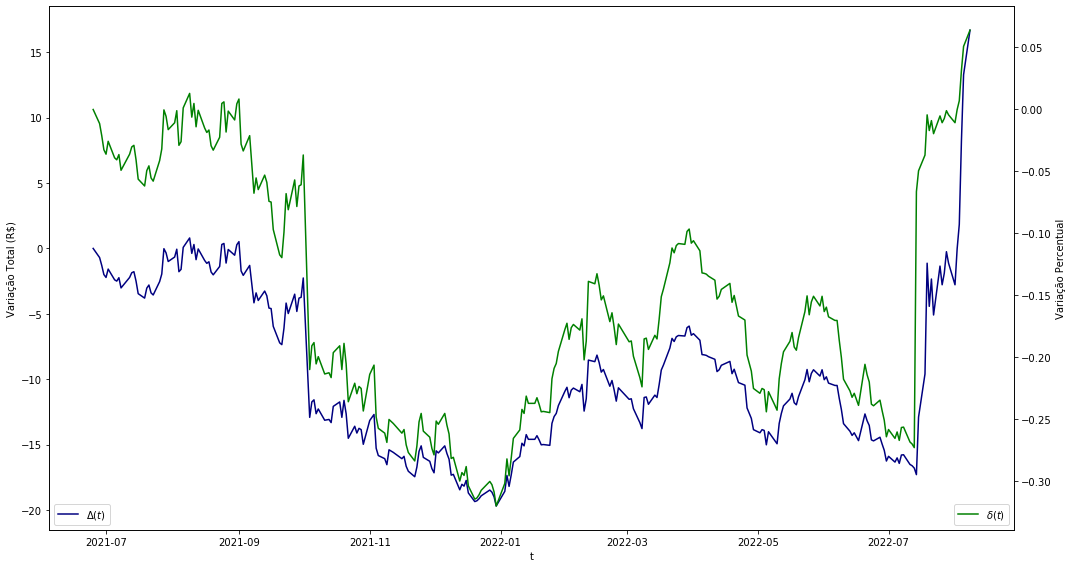

In [39]:
graficos(df)